In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from textblob import TextBlob
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/webmd.csv')
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362763 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [ ]:
df.shape

(362806, 12)

In [ ]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [ ]:
print('Number of drugs present in the dataset :',df['Drug'].nunique())
print('Number of unique medical conditions present in the dataset : ',df['Sides'].nunique())

print('\n The time period of collecting the data')
print('starting date :',df['Date'].min())
print('Ending date :',df['Date'].max())

Number of drugs present in the dataset : 7093
Number of unique medical conditions present in the dataset :  1651

 The time period of collecting the data
starting date : 1/1/2008
Ending date : 9/9/2019


In [ ]:
print('number of drugs with no useful count:',df[df['UsefulCount']==0].count()[0])

number of drugs with no useful count: 71608


In [ ]:
print('Number of drugs with 100 or more useful count:',df[df['UsefulCount']>=100].count()[0])

Number of drugs with 100 or more useful count: 139


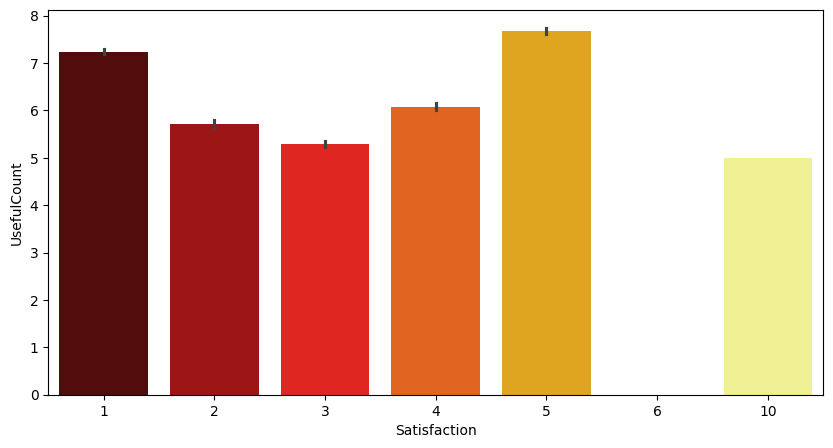

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
sns.barplot(x=df['Satisfaction'], y=df['UsefulCount'], palette='hot')
plt.show()

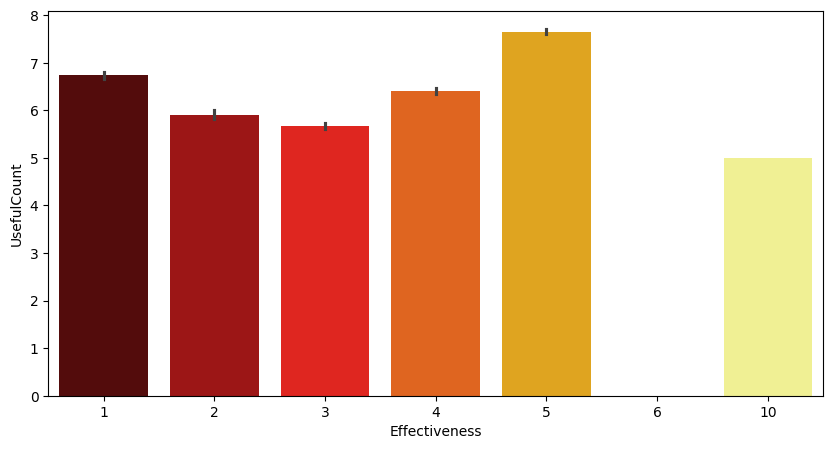

In [ ]:
sns.barplot(x=df['Effectiveness'],y=df['UsefulCount'],palette='hot')
plt.show()

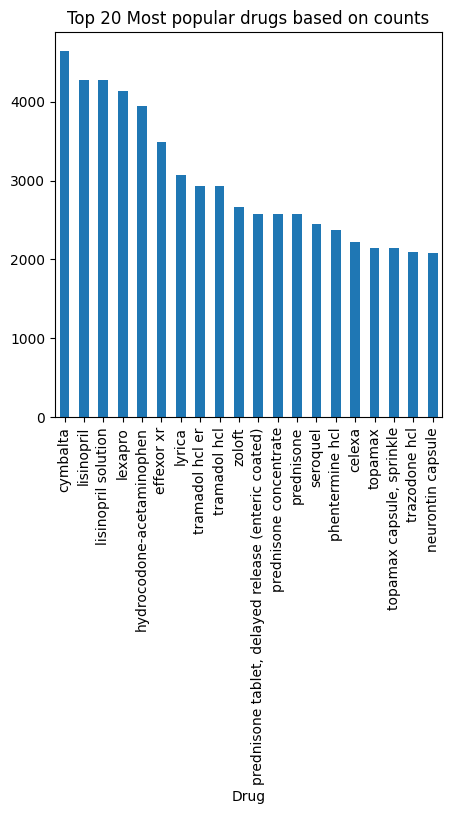

In [ ]:
plt.figure(figsize=(5,5))
df['Drug'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

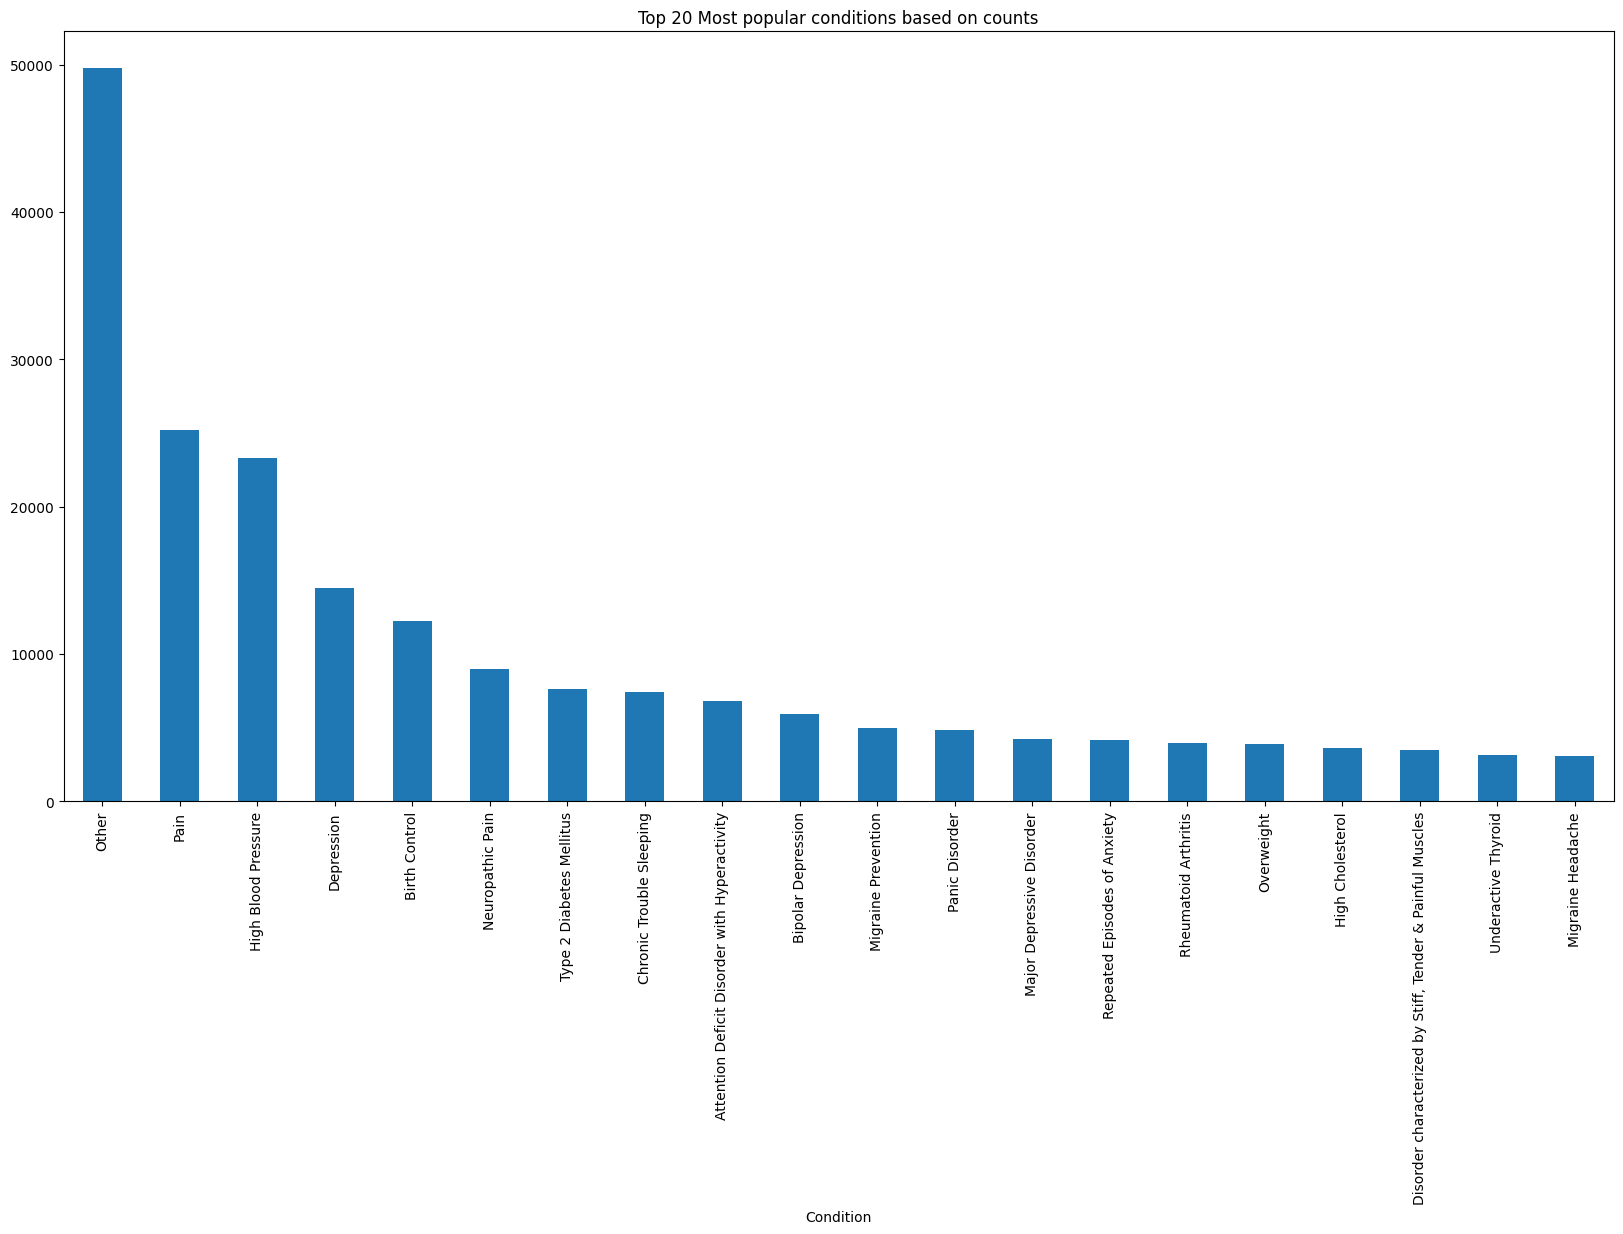

In [ ]:
plt.figure(figsize=(5,5))
df['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))
plt.title("Top 20 Most popular conditions based on counts")
plt.show()

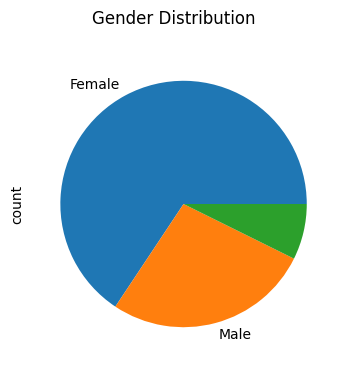

In [ ]:
ax = df.Sex.value_counts().plot.pie(subplots = True,figsize = (8,4), title = "Gender Distribution")

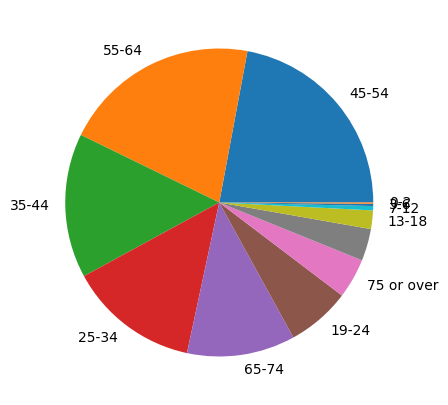

In [ ]:
age = df['Age'].value_counts()
plt.pie(age.values, labels=age.index)
plt.show()

In [ ]:
df.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          43
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [ ]:
df= df.dropna()

In [ ]:
df.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
data= [[col, df[col].nunique()] for col in df.columns.difference(['Reviews'])]
unique = pd.DataFrame(data= data, columns=['columns','number of unique values'])
print(unique)

          columns  number of unique values
0             Age                       12
1       Condition                     1805
2            Date                     4524
3            Drug                     7093
4          DrugId                     6572
5       EaseofUse                        7
6   Effectiveness                        7
7    Satisfaction                        7
8             Sex                        3
9           Sides                     1651
10    UsefulCount                      148


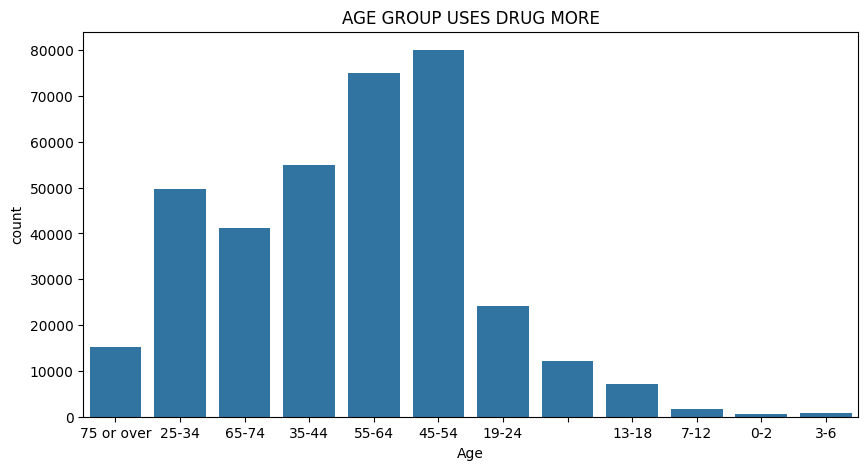

In [ ]:
sns.countplot(x='Age', data=df)
plt.title('AGE GROUP USES DRUG MORE')
plt.show()

In [ ]:
for col in df.columns:
    if df[col].dtype.kind == 'O':
        df[col]=df[col].str.strip()

In [ ]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [ ]:
print(df['Satisfaction'].value_counts())

Satisfaction
5     111537
1     100893
4      63149
3      51845
2      35336
6          2
10         1
Name: count, dtype: int64


In [ ]:
for col in ['Age','Condition','Sex','Reviews']:
    df= df[(df[col].astype(bool)&df[col].notnull())]

In [ ]:
print(df['Sex'].value_counts())

Sex
Female    212675
Male       81741
Name: count, dtype: int64


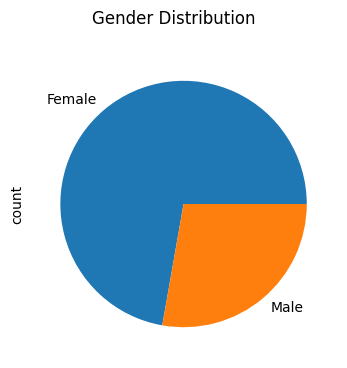

In [ ]:
ax = df.Sex.value_counts().plot.pie(subplots = True,figsize = (8,4), title = "Gender Distribution")

In [ ]:
def sentiment_polarity(text):
    review_sentiment=TextBlob(text).sentiment.polarity
    return review_sentiment

In [ ]:
df['sentiment_score'] = df['Reviews'].apply(sentiment_polarity)

In [ ]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,sentiment_score
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,0.337500
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,0.285714
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,0.150000
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,0.000000
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,0.046429


In [ ]:
data1=np.where(df['sentiment_score']==1, "No side effects", df['sentiment_score'])
data1=np.where(df['sentiment_score']<1, "Mild", data1)
data1=np.where(df['sentiment_score']<=0.2, "Moderate", data1)
data1=np.where(df['sentiment_score']<= -0.2, "Severe", data1)
data1=np.where(df['sentiment_score']== -1, "Extreme", data1)

In [ ]:
df['side effects']=data1

In [ ]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,sentiment_score,side effects
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,0.337500,Mild
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,0.285714,Mild
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,0.150000,Moderate
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,0.000000,Moderate
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,0.046429,Moderate


In [ ]:
print(df['side effects'].value_counts())

side effects
Moderate           203189
Mild                57298
Severe              31488
Extreme              1232
No side effects      1209
Name: count, dtype: int64


In [ ]:
df.drop(['DrugId','Reviews','Sides'],axis=1,inplace= True)

In [ ]:
df.head()

,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,sentiment_score,side effects
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,5,5,5,Male,0,0.337500,Mild
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,5,5,5,Female,1,0.285714,Mild
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,2,3,3,Female,0,0.150000,Moderate
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,2,2,1,Female,0,0.000000,Moderate
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,1,1,1,Male,1,0.046429,Moderate


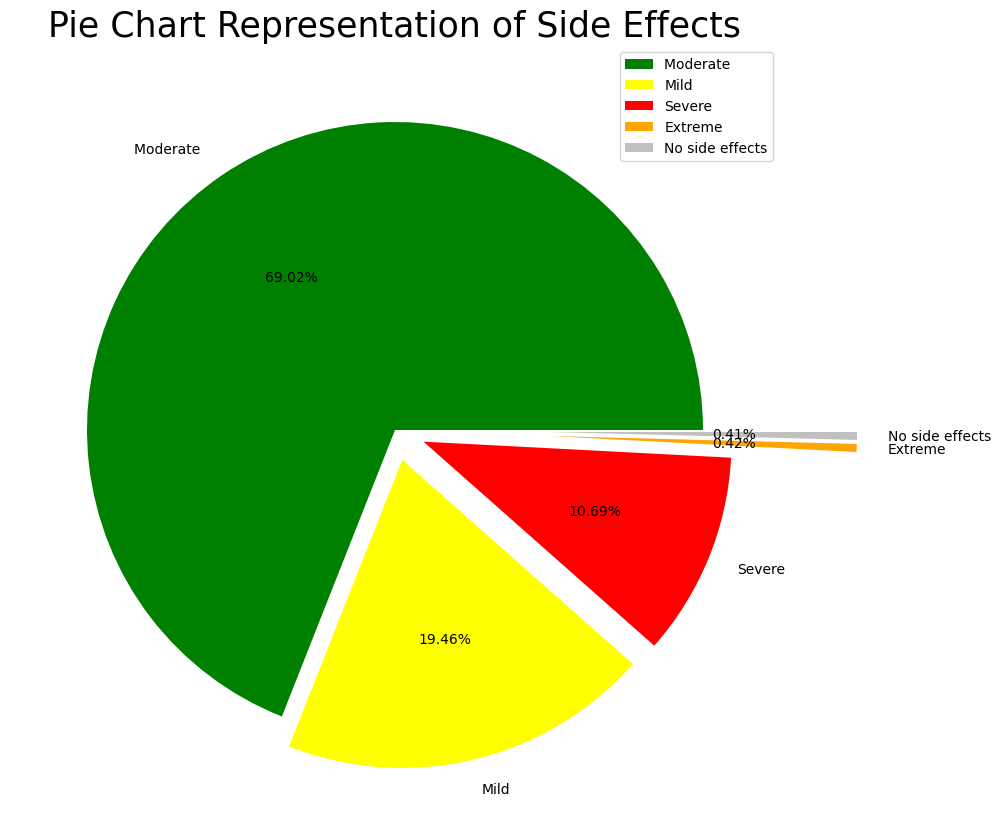

In [ ]:
size = [203192, 57296, 31487, 1232, 1209]
colors = ['green', 'yellow', 'red', 'orange', 'silver']
labels = "Moderate ","Mild", "Severe", "Extreme", "No side effects"
explode = [0, 0.1, 0.1, 0.5, 0.5]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Side Effects', fontsize = 25)
plt.legend()
plt.show()

In [ ]:
df=df.drop(labels=df[df.Condition=='Other'].index,axis=0)

In [ ]:
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1}).astype(int)

In [ ]:
df['Age'] = df['Age'].map({'0-2': 1,'3-6': 2,'7-12': 3,'13-18': 4,'19-24': 5,'25-34': 6,'35-44': 7,'45-54': 8,'55-64': 9,'65-74': 10,'75 or over': 11}).astype(int)

In [ ]:
df.head()

,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,sentiment_score,side effects
0,11,Stuffy Nose,9/21/2014,25dph-7.5peh,5,5,5,0,0,0.337500,Mild
1,6,Cold Symptoms,1/13/2011,25dph-7.5peh,5,5,5,1,1,0.285714,Mild
6,6,Birth Control,6/15/2017,wymzya fe,5,5,2,1,0,0.096667,Moderate
7,8,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,5,5,5,1,0,0.000000,Moderate
9,9,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",4,2,2,0,0,0.000000,Moderate


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.head()

,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,sentiment_score,side effects
0,11,Stuffy Nose,2014-09-21,25dph-7.5peh,5,5,5,0,0,0.337500,Mild
1,6,Cold Symptoms,2011-01-13,25dph-7.5peh,5,5,5,1,1,0.285714,Mild
6,6,Birth Control,2017-06-15,wymzya fe,5,5,2,1,0,0.096667,Moderate
7,8,Disease of Ovaries with Cysts,2017-01-30,wymzya fe,5,5,5,1,0,0.000000,Moderate
9,9,Stuffy Nose,2012-10-29,"12 hour nasal relief spray, non-aerosol",4,2,2,0,0,0.000000,Moderate


In [ ]:
counts = df['Drug'].value_counts()
df = df[~df['Drug'].isin(counts[counts < 6].index)]

In [ ]:
df.shape

(245528, 11)

In [ ]:
satisfiction_count=df['Satisfaction'].value_counts()
effectiveness_count=df['Effectiveness'].value_counts()
ease_of_use_count=df['EaseofUse'].value_counts()
li = [0,1,2,3,4,5,6]
Rating = pd.Series(li)
value_count=pd.concat([Rating ,satisfiction_count,effectiveness_count,ease_of_use_count],axis=1)
value_count.rename(columns = {0:'Rating','Satisfaction':'satisfiction_count','Effectiveness':'effectiveness_count','EaseofUse':'ease_of_use_count'}, inplace = True)

In [ ]:
value_count

,Rating,count,count,count
0,0,NaN,NaN,NaN
1,1,71952.0,40198.0,23494.0
2,2,24983.0,20970.0,11977.0
3,3,34257.0,40002.0,27119.0
4,4,41263.0,55100.0,50289.0
5,5,73071.0,89256.0,132647.0
6,6,2.0,2.0,2.0


In [ ]:
ls=df[df['Satisfaction']==6], df[df['Effectiveness']==6],df[df['EaseofUse']==6]
for i in ls:
  df=df.drop(i.index, axis=0)

In [ ]:
label=LabelEncoder()
df['Condition']=label.fit_transform(df['Condition'])

In [ ]:
df.head()

,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,sentiment_score,side effects
0,11,1278,2014-09-21,25dph-7.5peh,5,5,5,0,0,0.337500,Mild
1,6,351,2011-01-13,25dph-7.5peh,5,5,5,1,1,0.285714,Mild
9,9,1278,2012-10-29,"12 hour nasal relief spray, non-aerosol",4,2,2,0,0,0.000000,Moderate
13,5,202,2018-03-06,lyza,2,3,1,1,0,-0.457305,Severe
16,6,202,2017-10-07,lyza,1,1,1,1,1,-0.296970,Severe


In [ ]:
x= df.drop(['side effects','sentiment_score','Drug','Date'],axis=1)
y=df['side effects']

In [ ]:
x.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,11,1278,5,5,5,0,0
1,6,351,5,5,5,1,1
9,9,1278,4,2,2,0,0
13,5,202,2,3,1,1,0
16,6,202,1,1,1,1,1


In [ ]:
y

0             Mild
1             Mild
9         Moderate
13          Severe
16          Severe
            ...   
362799    Moderate
362801        Mild
362803      Severe
362804      Severe
362805        Mild
Name: side effects, Length: 245526, dtype: object

In [ ]:
ss = MinMaxScaler()
x.loc[:,'Condition'] = ss.fit_transform(x[['Condition']])
x.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,11,0.888117,5,5,5,0,0
1,6,0.243919,5,5,5,1,1
9,9,0.888117,4,2,2,0,0
13,5,0.140375,2,3,1,1,0
16,6,0.140375,1,1,1,1,1


In [ ]:
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size= 0.3, random_state= 42)
x_train.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
166755,7,0.793607,3,3,1,1,1
183249,9,0.234885,4,3,3,1,4
208571,6,0.138290,5,1,1,1,18
66165,5,0.912439,4,2,2,1,6
191364,10,0.605976,3,1,1,1,19


In [ ]:
Random_forest=RandomForestClassifier()
Random_forest.fit(x_train,y_train)
y_pred = Random_forest.predict(x_test)

In [ ]:
print("Accuracy is", accuracy_score(y_test,y_pred))
print("precision is", precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall is", recall_score(y_test,y_pred,  pos_label='positive', average='micro'))
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6987699910396699
precision is 0.6987699910396699
Recall is 0.6987699910396699
f1 score is 0.6987699910396699


array([[   61,    23,   197,     0,    28],
       [   10,  4952,  8967,    21,   430],
       [   65,  4585, 44019,    62,  2127],
       [    0,    50,   176,    38,     6],
       [   15,   449,  4974,     3,  2400]])

In [ ]:
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [ ]:
print("Accuracy is", accuracy_score(y_test,y_pred))
print("precision is", precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall is", recall_score(y_test,y_pred,  pos_label='positive', average='micro'))
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is 0.690461321241413
precision is 0.690461321241413
Recall is 0.690461321241413
f1 score is 0.690461321241413


array([[    0,     0,   309,     0,     0],
       [    0,     0, 14380,     0,     0],
       [    0,     0, 50858,     0,     0],
       [    0,     0,   270,     0,     0],
       [    0,     0,  7841,     0,     0]])

In [ ]:
acc_values=[]

neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

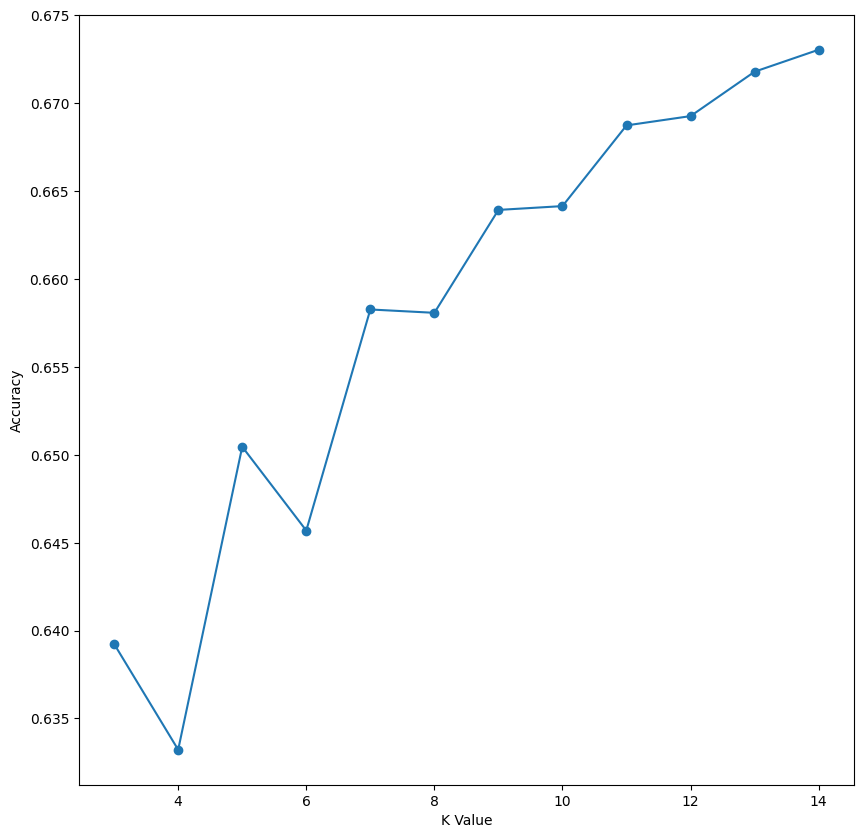

In [ ]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy');

In [ ]:
# Performance Evaluation:
print("Accuracy is", accuracy_score(y_test,y_pred))
print("precision is", precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall is", recall_score(y_test,y_pred,  pos_label='positive', average='micro'))
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is 0.673029406174482
precision is 0.673029406174482
Recall is 0.673029406174482
f1 score is 0.673029406174482


array([[    0,    10,   294,     0,     5],
       [    0,  1976, 12337,     0,    67],
       [    0,  3026, 47391,     1,   440],
       [    0,    35,   232,     2,     1],
       [    0,   256,  7380,     0,   205]])

In [ ]:
logit_model=LogisticRegression(multi_class='multinomial', solver='lbfgs')
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [ ]:
print("Accuracy is", accuracy_score(y_test,y_pred))
print("precision is", precision_score(y_test, y_pred, pos_label='positive', average='micro'))
print("Recall is", recall_score(y_test,y_pred,  pos_label='positive', average='micro'))
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))
print("confusion matrix \n", confusion_matrix(y_test,y_pred))

Accuracy is 0.690461321241413
precision is 0.690461321241413
Recall is 0.690461321241413
f1 score is 0.690461321241413
confusion matrix 
 [[    0     0   309     0     0]
 [    0     0 14380     0     0]
 [    0     0 50858     0     0]
 [    0     0   270     0     0]
 [    0     0  7841     0     0]]
